In [1]:

import kaggle

In [2]:
kaggle.api.authenticate()

In [3]:
kaggle.api.dataset_download_files('datamunge/sign-language-mnist', path='./data/sign-language-mnist', unzip=True)

In [4]:
import tensorflow as tf

In [5]:
import pandas as pd
import numpy as np

In [114]:
sign_train = pd.read_csv(
    "./data/sign-language-mnist/sign_mnist_train.csv")
sign_test = pd.read_csv(
    "./data/sign-language-mnist/sign_mnist_test.csv")

In [97]:
sign_train.head(), sign_test.head()

(   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
 0      3     107     118     127     134     139     143     146     150   
 1      6     155     157     156     156     156     157     156     158   
 2      2     187     188     188     187     187     186     187     188   
 3      2     211     211     212     212     211     210     211     210   
 4     13     164     167     170     172     176     179     180     184   
 
    pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
 0     153  ...       207       207       207       207       206       206   
 1     158  ...        69       149       128        87        94       163   
 2     187  ...       202       201       200       199       198       199   
 3     210  ...       235       234       233       231       230       226   
 4     185  ...        92       105       105       108       133       163   
 
    pixel781  pixel782  pixel783  pixel784  
 0       206   

In [115]:
train_labels = sign_train.pop('label')
test_labels = sign_test.pop('label')

In [116]:
train_data = np.array(sign_train).reshape(-1,28, 28)
test_data = np.array(sign_test).reshape(-1,28, 28)

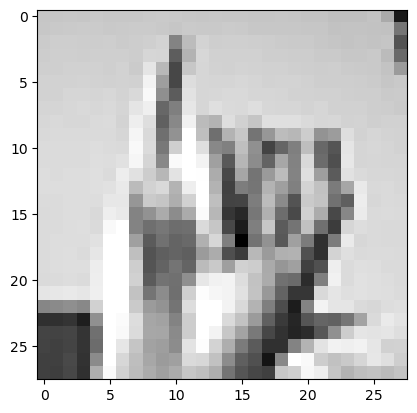

8

In [121]:

import matplotlib.pyplot as plt

plt.imshow(test_data[10], cmap='gray')
plt.show()
test_labels[10]

In [81]:
train_labels.dtype
np.unique(train_labels)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [122]:
class_names = [chr(i) for i in range(65,90) ]

len(class_names)

25

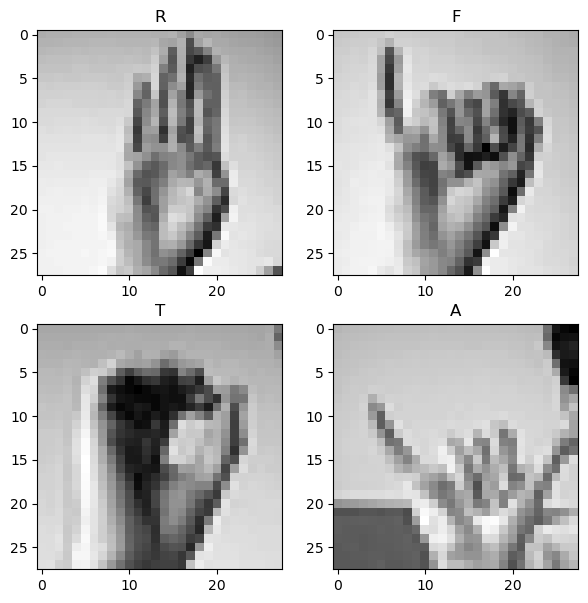

In [166]:
import random
 
plt.figure(figsize=(7,7))
    
for i in range(4):
    ax = plt.subplot(2,2, i+1)
    rand_index = random.choice(range(len(test_data)))
    plt.imshow(test_data[rand_index], cmap=plt.cm.gray)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis= "off"

In [177]:
tf.random.set_seed(42)
model_MCC = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(25, activation="relu"),
    tf.keras.layers.Dense(25, activation="relu"),
    tf.keras.layers.Dense(25, activation=tf.keras.activations.softmax)
    
])
model_MCC.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [178]:
model_MCC.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 25)                19625     
                                                                 
 dense_28 (Dense)            (None, 25)                650       
                                                                 
 dense_29 (Dense)            (None, 25)                650       
                                                                 
Total params: 20,925
Trainable params: 20,925
Non-trainable params: 0
_________________________________________________________________


In [179]:
train_oh_l = tf.one_hot(train_labels, depth=25)
test_oh_l = tf.one_hot(test_labels, depth=25)

In [180]:
history = model_MCC.fit(train_data/255.0, train_oh_l, epochs=10, validation_data=(test_data/255.0, test_oh_l))

Epoch 1/10


2023-02-11 10:34:28.000562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


856/858 [============================>.] - ETA: 0s - loss: 2.4288 - accuracy: 0.2397

2023-02-11 10:34:36.494398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


858/858 [==============================] - 10s 11ms/step - loss: 2.4275 - accuracy: 0.2403 - val_loss: 1.9659 - val_accuracy: 0.3629
Epoch 2/10
858/858 [==============================] - 9s 11ms/step - loss: 1.6605 - accuracy: 0.4534 - val_loss: 1.7865 - val_accuracy: 0.4088
Epoch 3/10
858/858 [==============================] - 9s 11ms/step - loss: 1.3641 - accuracy: 0.5493 - val_loss: 1.5996 - val_accuracy: 0.4724
Epoch 4/10
858/858 [==============================] - 9s 11ms/step - loss: 1.1808 - accuracy: 0.6067 - val_loss: 1.6108 - val_accuracy: 0.4927
Epoch 5/10
858/858 [==============================] - 9s 11ms/step - loss: 1.0581 - accuracy: 0.6440 - val_loss: 1.4848 - val_accuracy: 0.5322
Epoch 6/10
858/858 [==============================] - 9s 11ms/step - loss: 0.9638 - accuracy: 0.6742 - val_loss: 1.4544 - val_accuracy: 0.5158
Epoch 7/10
858/858 [==============================] - 9s 11ms/step - loss: 0.8945 - accuracy: 0.6967 - val_loss: 1.4468 - val_accuracy: 0.5291
Epoch 8/1

In [184]:
tf.random.set_seed(42)
model_MCC_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(25, activation=tf.keras.activations.softmax)
    
])
model_MCC_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [186]:
history = model_MCC_2.fit(train_data/255.0, train_oh_l, epochs=10, validation_data=(test_data/255.0, test_oh_l))

Epoch 1/10
  1/858 [..............................] - ETA: 4:33 - loss: 3.8060 - accuracy: 0.0312

2023-02-11 10:36:51.742319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


858/858 [==============================] - ETA: 0s - loss: 2.1876 - accuracy: 0.3203

2023-02-11 10:37:00.197508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


858/858 [==============================] - 10s 11ms/step - loss: 2.1876 - accuracy: 0.3203 - val_loss: 1.6606 - val_accuracy: 0.4810
Epoch 2/10
858/858 [==============================] - 10s 12ms/step - loss: 1.3329 - accuracy: 0.5671 - val_loss: 1.4900 - val_accuracy: 0.5406
Epoch 3/10
858/858 [==============================] - 10s 11ms/step - loss: 1.0158 - accuracy: 0.6661 - val_loss: 1.2551 - val_accuracy: 0.6054
Epoch 4/10
858/858 [==============================] - 10s 11ms/step - loss: 0.8238 - accuracy: 0.7339 - val_loss: 1.2963 - val_accuracy: 0.5917
Epoch 5/10
858/858 [==============================] - 10s 11ms/step - loss: 0.6711 - accuracy: 0.7898 - val_loss: 1.2581 - val_accuracy: 0.6180
Epoch 6/10
858/858 [==============================] - 10s 12ms/step - loss: 0.5584 - accuracy: 0.8270 - val_loss: 1.1840 - val_accuracy: 0.6488
Epoch 7/10
858/858 [==============================] - 10s 12ms/step - loss: 0.4597 - accuracy: 0.8607 - val_loss: 1.1942 - val_accuracy: 0.6810
Epo

In [188]:
tf.random.set_seed(42)
model_MCC_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(25, activation=tf.keras.activations.softmax)
    
])
model_MCC_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [189]:
history = model_MCC_3.fit(train_data/255.0, train_oh_l, epochs=10, validation_data=(test_data/255.0, test_oh_l))

Epoch 1/10
  1/858 [..............................] - ETA: 4:34 - loss: 3.4928 - accuracy: 0.0000e+00

2023-02-11 10:38:30.560578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


858/858 [==============================] - ETA: 0s - loss: 1.9656 - accuracy: 0.3976

2023-02-11 10:38:39.029351: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


858/858 [==============================] - 10s 12ms/step - loss: 1.9656 - accuracy: 0.3976 - val_loss: 1.4330 - val_accuracy: 0.5736
Epoch 2/10
858/858 [==============================] - 10s 11ms/step - loss: 1.0185 - accuracy: 0.6697 - val_loss: 1.1831 - val_accuracy: 0.6212
Epoch 3/10
858/858 [==============================] - 10s 12ms/step - loss: 0.6698 - accuracy: 0.7843 - val_loss: 1.0724 - val_accuracy: 0.6470
Epoch 4/10
858/858 [==============================] - 9s 11ms/step - loss: 0.4395 - accuracy: 0.8631 - val_loss: 0.9560 - val_accuracy: 0.6987
Epoch 5/10
858/858 [==============================] - 9s 11ms/step - loss: 0.3001 - accuracy: 0.9087 - val_loss: 0.9774 - val_accuracy: 0.7170
Epoch 6/10
858/858 [==============================] - 10s 11ms/step - loss: 0.2129 - accuracy: 0.9384 - val_loss: 1.0092 - val_accuracy: 0.7168
Epoch 7/10
858/858 [==============================] - 9s 11ms/step - loss: 0.1458 - accuracy: 0.9617 - val_loss: 0.9550 - val_accuracy: 0.7302
Epoch 

In [190]:
tf.random.set_seed(42)
model_MCC_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(25, activation=tf.keras.activations.softmax)
    
])
model_MCC_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [191]:
history = model_MCC_4.fit(train_data/255.0, train_oh_l, epochs=10, validation_data=(test_data/255.0, test_oh_l))

Epoch 1/10
  1/858 [..............................] - ETA: 4:38 - loss: 3.5206 - accuracy: 0.0312

2023-02-11 10:40:07.966654: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


858/858 [==============================] - ETA: 0s - loss: 1.8002 - accuracy: 0.4408

2023-02-11 10:40:16.380439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


858/858 [==============================] - 10s 11ms/step - loss: 1.8002 - accuracy: 0.4408 - val_loss: 1.3686 - val_accuracy: 0.5627
Epoch 2/10
858/858 [==============================] - 10s 11ms/step - loss: 0.8204 - accuracy: 0.7335 - val_loss: 1.0164 - val_accuracy: 0.6584
Epoch 3/10
858/858 [==============================] - 10s 11ms/step - loss: 0.4564 - accuracy: 0.8570 - val_loss: 0.9002 - val_accuracy: 0.7248
Epoch 4/10
858/858 [==============================] - 10s 11ms/step - loss: 0.2644 - accuracy: 0.9213 - val_loss: 0.8943 - val_accuracy: 0.7460
Epoch 5/10
858/858 [==============================] - 10s 11ms/step - loss: 0.1726 - accuracy: 0.9490 - val_loss: 0.9504 - val_accuracy: 0.7333
Epoch 6/10
858/858 [==============================] - 10s 12ms/step - loss: 0.1106 - accuracy: 0.9691 - val_loss: 0.9814 - val_accuracy: 0.7545
Epoch 7/10
858/858 [==============================] - 10s 11ms/step - loss: 0.0866 - accuracy: 0.9755 - val_loss: 0.9355 - val_accuracy: 0.7807
Epo

In [245]:
tf.random.set_seed(42)
model_MCC_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(400, activation="relu"),
    tf.keras.layers.Dense(400, activation="relu"),
    tf.keras.layers.Dense(25, activation=tf.keras.activations.softmax)
    
])
model_MCC_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [246]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
history = model_MCC_5.fit(train_data/255.0, train_oh_l, epochs=50, validation_data=(test_data/255.0, test_oh_l), callbacks=[callback])

Epoch 1/50
  3/858 [..............................] - ETA: 25s - loss: 3.2304 - accuracy: 0.0417 

2023-02-11 11:17:37.124742: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


856/858 [============================>.] - ETA: 0s - loss: 1.6135 - accuracy: 0.4898

2023-02-11 11:17:45.876420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


858/858 [==============================] - 11s 12ms/step - loss: 1.6117 - accuracy: 0.4904 - val_loss: 1.3302 - val_accuracy: 0.5747
Epoch 2/50
858/858 [==============================] - 10s 12ms/step - loss: 0.6351 - accuracy: 0.7930 - val_loss: 0.9460 - val_accuracy: 0.6884
Epoch 3/50
858/858 [==============================] - 10s 12ms/step - loss: 0.3084 - accuracy: 0.9036 - val_loss: 0.9118 - val_accuracy: 0.7422
Epoch 4/50
858/858 [==============================] - 10s 12ms/step - loss: 0.1733 - accuracy: 0.9468 - val_loss: 0.8160 - val_accuracy: 0.7734
Epoch 5/50
858/858 [==============================] - 10s 12ms/step - loss: 0.1216 - accuracy: 0.9632 - val_loss: 0.8276 - val_accuracy: 0.7758
Epoch 6/50
858/858 [==============================] - 10s 12ms/step - loss: 0.0915 - accuracy: 0.9720 - val_loss: 1.0540 - val_accuracy: 0.7790
Epoch 7/50
858/858 [==============================] - 10s 12ms/step - loss: 0.0960 - accuracy: 0.9707 - val_loss: 1.0384 - val_accuracy: 0.7526
Epo

In [247]:
model_MCC_6.save("./data/sign-language-mnist/saveon8298_400")
model_MCC_6.save("./data/sign-language-mnist/saveon8298_400.h5")

INFO:tensorflow:Assets written to: ./data/sign-language-mnist/saveon8298_400/assets


In [207]:
tf.random.set_seed(42)
model_MCC_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dense(25, activation=tf.keras.activations.softmax)
    
])
model_MCC_6.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [208]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
history = model_MCC_6.fit(train_data/255.0, train_oh_l, epochs=50, validation_data=(test_data/255.0, test_oh_l), callbacks=[callback])

Epoch 1/50
 10/858 [..............................] - ETA: 10s - loss: 3.4890 - accuracy: 0.0813

2023-02-11 10:55:54.948513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


858/858 [==============================] - ETA: 0s - loss: 1.5437 - accuracy: 0.5044

2023-02-11 10:56:04.116706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


858/858 [==============================] - 11s 12ms/step - loss: 1.5437 - accuracy: 0.5044 - val_loss: 1.1410 - val_accuracy: 0.5955
Epoch 2/50
858/858 [==============================] - 10s 12ms/step - loss: 0.5492 - accuracy: 0.8158 - val_loss: 0.7958 - val_accuracy: 0.7486
Epoch 3/50
858/858 [==============================] - 11s 12ms/step - loss: 0.2507 - accuracy: 0.9169 - val_loss: 0.8432 - val_accuracy: 0.7688
Epoch 4/50
858/858 [==============================] - 11s 12ms/step - loss: 0.1288 - accuracy: 0.9610 - val_loss: 0.8949 - val_accuracy: 0.7797
Epoch 5/50
858/858 [==============================] - 11s 12ms/step - loss: 0.0982 - accuracy: 0.9692 - val_loss: 0.8307 - val_accuracy: 0.8030
Epoch 6/50
858/858 [==============================] - 10s 12ms/step - loss: 0.0915 - accuracy: 0.9725 - val_loss: 0.9464 - val_accuracy: 0.7828
Epoch 7/50
858/858 [==============================] - 10s 12ms/step - loss: 0.0617 - accuracy: 0.9817 - val_loss: 0.7931 - val_accuracy: 0.8328
Epo

In [210]:
model_MCC_6.save("./data/sign-language-mnist/saveon8433")
model_MCC_6.save("./data/sign-language-mnist/saveon8433.h5")

INFO:tensorflow:Assets written to: ./data/sign-language-mnist/saveon8433/assets


In [264]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(15, 15), text_size=8): 
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

    If classes is passed, confusion matrix will be labelled, if not, integer class values
    will be used.

    Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

    Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

    Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
    """  
  # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if cm_norm[i, j]>0.05:
            text = f"{cm_norm[i, j]*100:.1f}"
        else:
            text = ""
        plt.text(j, i, text,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)

In [268]:
y_preds = model_MCC_6.predict(test_data/255.0)

 66/225 [=======>......................] - ETA: 0s

2023-02-11 14:34:44.999292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


225/225 [==============================] - 1s 2ms/step


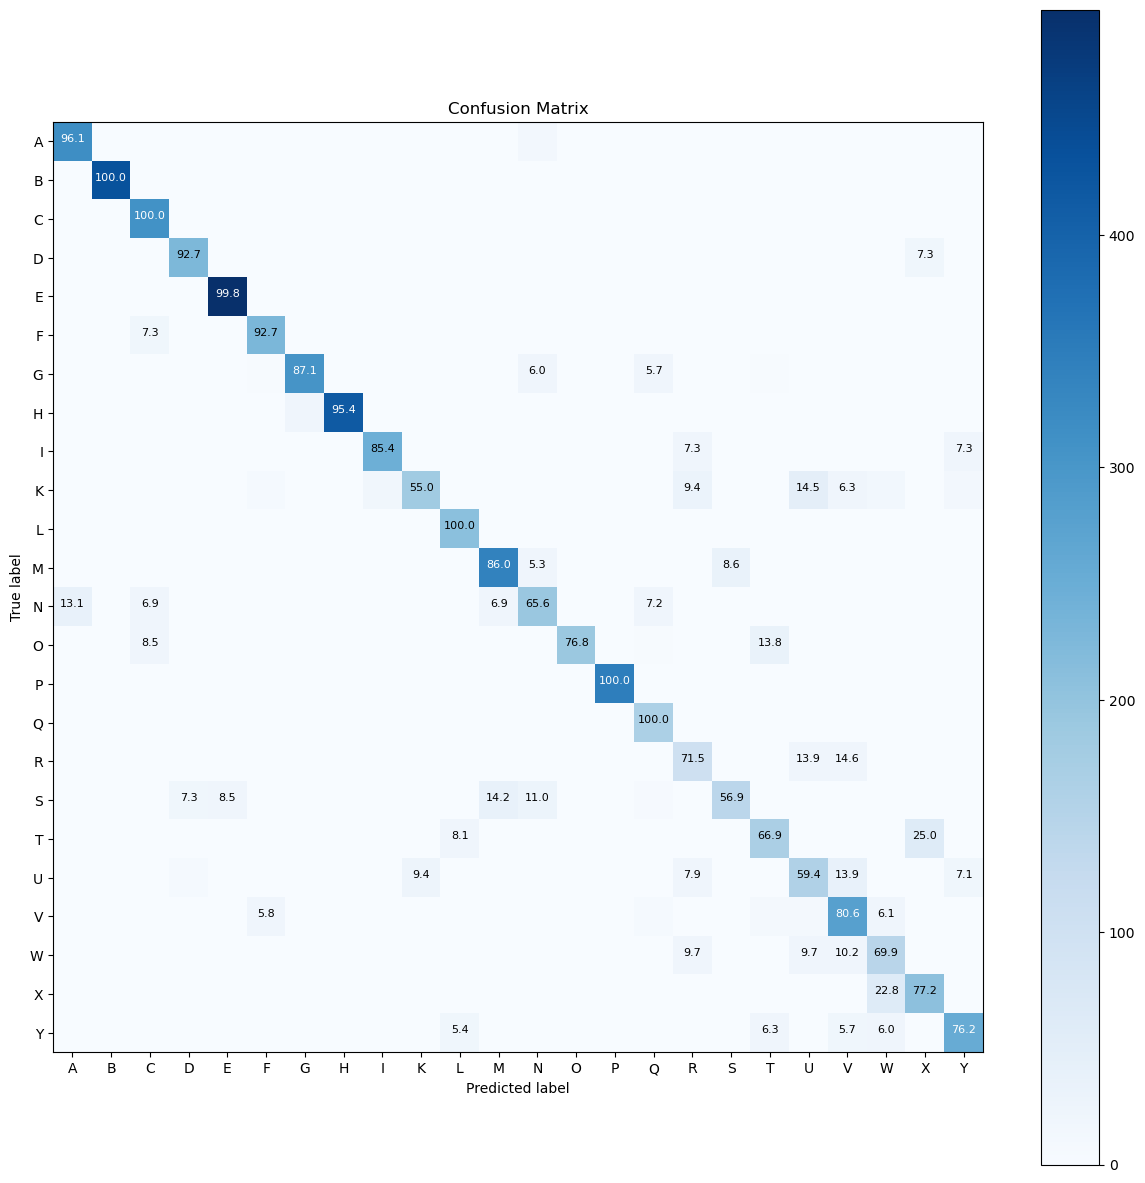

In [265]:

make_confusion_matrix(test_labels, y_preds.argmax(axis=1), classes=class_names)

In [266]:
y_preds = model_MCC_5.predict(test_data/255.0)

 61/225 [=======>......................] - ETA: 0s

2023-02-11 13:24:53.016740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


225/225 [==============================] - 1s 2ms/step


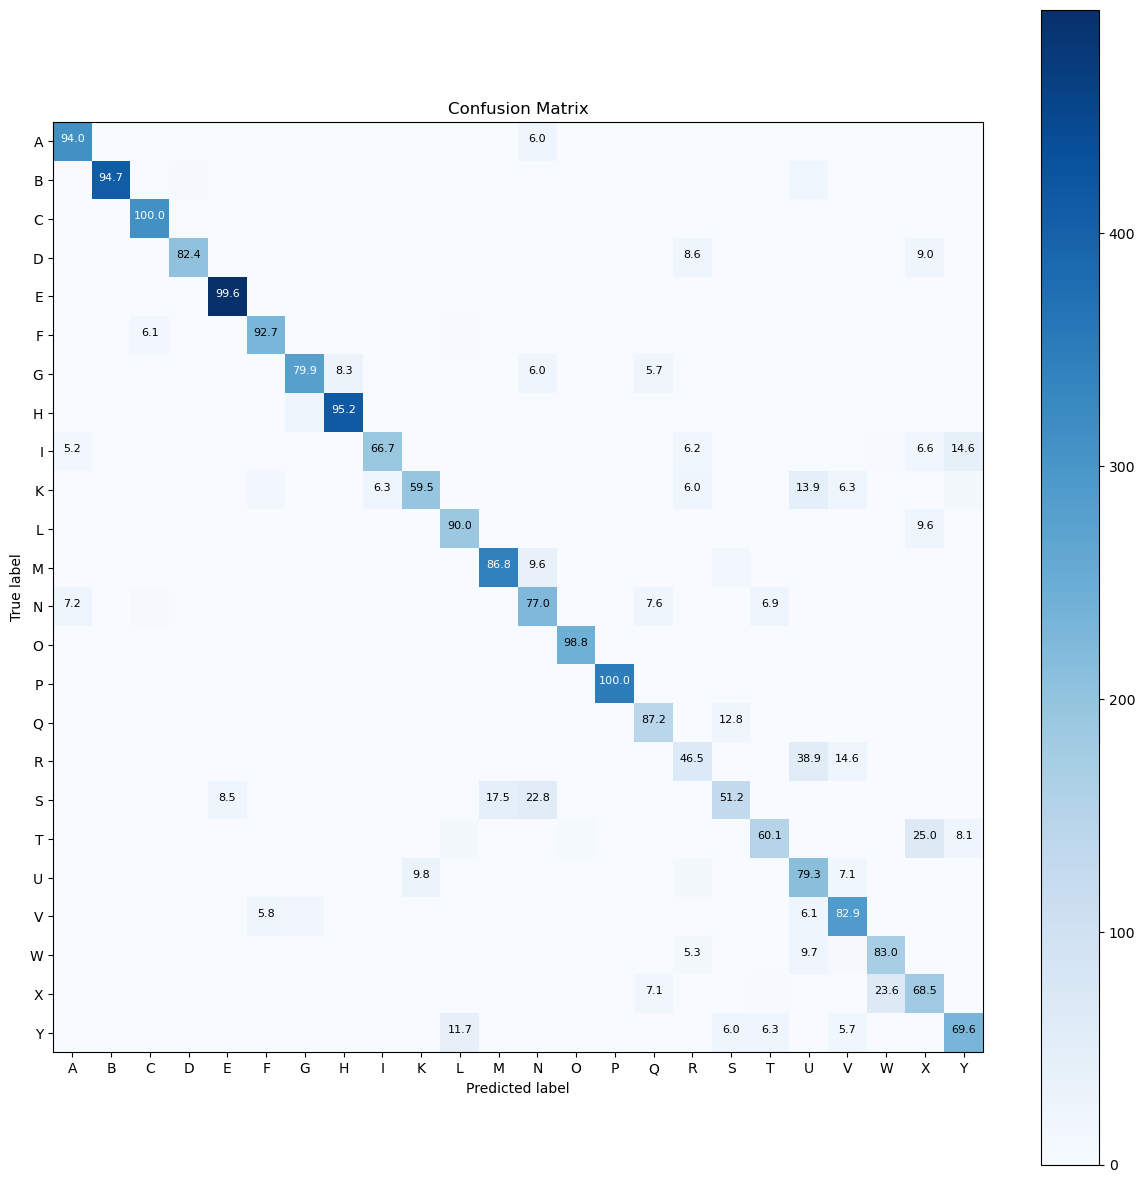

In [267]:
make_confusion_matrix(test_labels, y_preds.argmax(axis=1), classes=class_names)

In [355]:
cm = confusion_matrix(test_labels, y_preds.argmax(axis=1))

In [370]:
cross_confusion = {}

def top_3(i):
    f_max = i.argmax(axis=0)
    t_max = None
    if i[f_max]:
        i[f_max] = 0
        s_max = i.argmax(axis=0)
        if i[s_max]:
            i[s_max] = 0
            t_max = i.argmax(axis=0)
            if not i[t_max]:
                t_max = None
        else:
            s_max = None
            
    else:
        f_max = None
    return f_max, s_max, t_max

for i in cm:

    f_max, s_max, t_max= top_3(np.copy(i))
    
    t = np.sum(i)
        
    cross_confusion[f_max] = {}
    print(class_names[f_max], end=' ')
    if s_max:
        print("confused with: " + class_names[s_max] + f" - {i[s_max]/t*100:.1f}", end=' ')
        cross_confusion[f_max][s_max] = i[s_max]/t*100
        s_max = None
    if t_max:
        print(", and " + class_names[t_max]+ f" - {i[t_max]/t*100:.1f}")
        cross_confusion[f_max][t_max] = i[t_max]/t*100
        t_max = None
    print()


A confused with: N - 3.9 
B 
C 
D confused with: X - 7.3 
E confused with: S - 0.2 
F confused with: C - 7.3 
G confused with: N - 6.0 , and Q - 5.7

H confused with: G - 4.6 
I confused with: R - 7.3 , and Y - 7.3

K confused with: U - 14.5 , and R - 9.4

L 
M confused with: S - 8.6 , and N - 5.3

N , and Q - 7.2

O confused with: T - 13.8 , and C - 8.5

P 
Q 
R confused with: V - 14.6 , and U - 13.9

S confused with: M - 14.2 , and N - 11.0

T confused with: X - 25.0 , and L - 8.1

U confused with: V - 13.9 , and K - 9.4

V confused with: W - 6.1 , and F - 5.8

W confused with: V - 10.2 , and R - 9.7

X confused with: W - 22.8 
Y confused with: T - 6.3 , and W - 6.0



In [381]:
for k, v in cross_confusion.items():
    for vv in v:

        if k in cross_confusion[vv].keys():
            print({k:{class_names[vi]:v[vi] for vi in v}})


{9: {'U': 14.501510574018129, 'R': 9.365558912386707}}
{11: {'S': 8.629441624365482, 'N': 5.32994923857868}}
{17: {'M': 14.227642276422763, 'N': 10.975609756097562}}
{19: {'V': 13.909774436090224, 'K': 9.398496240601503}}
{20: {'W': 6.069364161849711, 'F': 5.780346820809249}}
{21: {'V': 10.194174757281553, 'R': 9.70873786407767}}


In [371]:
cross_confusion

{0: {12: 3.927492447129909},
 1: {},
 2: {},
 3: {22: 7.346938775510205},
 4: {17: 0.2008032128514056},
 5: {2: 7.28744939271255},
 6: {12: 6.0344827586206895, 15: 5.747126436781609},
 7: {6: 4.587155963302752},
 8: {16: 7.291666666666667, 23: 7.291666666666667},
 9: {19: 14.501510574018129, 16: 9.365558912386707},
 10: {},
 11: {17: 8.629441624365482, 12: 5.32994923857868},
 12: {15: 7.216494845360824},
 13: {18: 13.821138211382115, 2: 8.536585365853659},
 14: {},
 15: {},
 16: {20: 14.583333333333334, 19: 13.88888888888889},
 17: {11: 14.227642276422763, 12: 10.975609756097562},
 18: {22: 25.0, 10: 8.064516129032258},
 19: {20: 13.909774436090224, 9: 9.398496240601503},
 20: {21: 6.069364161849711, 5: 5.780346820809249},
 21: {20: 10.194174757281553, 16: 9.70873786407767},
 22: {21: 22.846441947565545},
 23: {18: 6.325301204819277, 21: 6.024096385542169}}